In [6]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid
import cf
import cfplot as cfp
import matplotlib
import numpy.ma as MA

## Import xltln data with emissions included

In [7]:
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_ch4.nc')
#extract variables to arrays
ch4 = data.variables['ch4'][:]*28/16.*1e9 #ppb
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
#alt = data.variables['level_height'][:]

ch4, lon = shiftgrid(180.,ch4,lon,start=False)

In [18]:
press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press_xl = press_xl_data.variables['p']

In [20]:
trop_press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_troppres.nc')
trop_press_xl = trop_press_xl_data.variables['p']

In [10]:
#mass_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_airmass.nc')
#mass = mass_data.variables['airmass_atm']

In [11]:
time = data.variables['time']
dtime = nc.num2date(time[:],time.units)

## Import fixed LBC data

In [12]:
data_lbc = nc.Dataset('/shared/netscratch/ptg21/UM_data/xgywn/xgywn_pm7-9.nc')
#extract variables to arrays
ch4_lbc = data_lbc.variables['field34009'][:]*28/16.*1e9 #ppb
lat_lbc = data_lbc.variables['latitude'][:]
lon_lbc = data_lbc.variables['longitude'][:]
#box_no_lbc = data_lbc.variables['model_level_number'][:]
#alt_lbc = data_lbc.variables['hybrid_ht'][:]
#mass_lbc = data_lbc.variables['field34363'][:]
press_lbc = data_lbc.variables['p']
trop_press_lbc = data_lbc.variables['p_3']

time_lbc = data_lbc.variables['t']
dtime_lbc = nc.num2date(time_lbc[:],time_lbc.units)

ch4_lbc, lon_lbc = shiftgrid(180.,ch4_lbc,lon_lbc,start=False)

## Make tropospheric mask

In [33]:
trop_mask_xg = MA.masked_where(press_lbc < trop_press_lbc[:], press_lbc)

In [28]:
trop_mask_xl = MA.masked_where(press_xl < trop_press_xl[:][:,None,:,:], press_xl) #add extra dimension
#print(press_lbc)

In [31]:
#apply trop masks to methane data
ch4_trop_xg = MA.masked_where(trop_mask_xg.mask,ch4_lbc)
ch4_trop_xl = MA.masked_where(trop_mask_xl.mask,ch4)

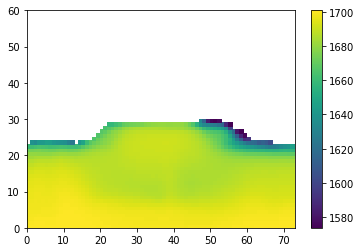

In [30]:
plt.pcolormesh(np.mean(ch4_trop_xg, axis=(0,3)))
#average over axes 0:time and 3:longitude to get zonal mean
plt.colorbar()

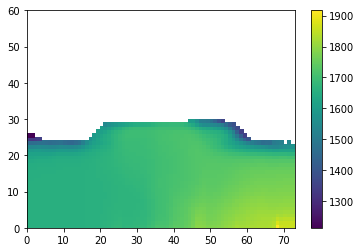

In [32]:
plt.pcolormesh(np.mean(ch4_trop_xl, axis=(0,3)))
#average over axes 0:time and 3:longitude to get zonal mean
plt.colorbar()

## Hemispheric mean calc

In [44]:
#find index of zero latitude
lat_0_xl = np.where(lat == 0)
print(lat_0_xl)

lat_0_xg = np.where(lat_lbc == 0)
print(lat_0_xg)

(array([36]),)
(array([36]),)


### With emissions: xltln

In [56]:
mean_ch4_xl_SH = np.int(np.mean(ch4_trop_xl[:,:,:36,:],axis=(0,1,2,3)))
print(f'SH average: {mean_ch4_xl_SH} ppbv')

mean_ch4_xl_NH = np.int(np.mean(ch4_trop_xl[:,:,36:,:],axis=(0,1,2,3)))
print(f'NH average: {mean_ch4_xl_NH} ppbv')
print()
print(f'Interhemispheric gradient: {mean_ch4_xl_NH - mean_ch4_xl_SH} ppbv')

SH average: 1664 ppbv
NH average: 1743 ppbv

Interhemispheric gradient: 79 ppbv


### Fixed LBC: xgywn

In [59]:
mean_ch4_xg_SH = np.int(np.mean(ch4_trop_xg[:,:,:36,:],axis=(0,1,2,3)))
print(f'SH average: {mean_ch4_xg_SH} ppbv')

mean_ch4_xg_NH = np.int(np.mean(ch4_trop_xg[:,:,36:,:],axis=(0,1,2,3)))
print(f'NH average: {mean_ch4_xg_NH} ppbv')
print()
print(f'Interhemispheric gradient: {mean_ch4_xg_NH - mean_ch4_xg_SH} ppbv')

SH average: 1692 ppbv
NH average: 1689 ppbv

Interhemispheric gradient: -3 ppbv
